In [23]:

#LOGISTIC REGRESSION------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
#(1 and 2)
#Loading the dataset (Creating dataframme with pandas)
data = pd.read_csv("/home/aaliya/Downloads/Dataset_LogisticRegression.csv")

#Dividing by target-Y and other inout variables for performing logistic regression
#The reason we choose 'Outcome' also is because the data is given as 0 and 1. So we can clearly tell its output of a classification model 
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

#Standardizing features
#Using StandardScaler to scale features because logistic regression is a model which is sensitive to the scale of input features
#We use this over other pre-processing and scalers as it's less affected by outliers and generally a default choice
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting dataset - (for given Testing data - 30% and Random state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)


In [25]:
#(3)
#Hyperparameters are variables that are manually set before training a model to control the learning process
#Grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [26]:
#(5)
#Plot hyperparameters vs accuracy
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

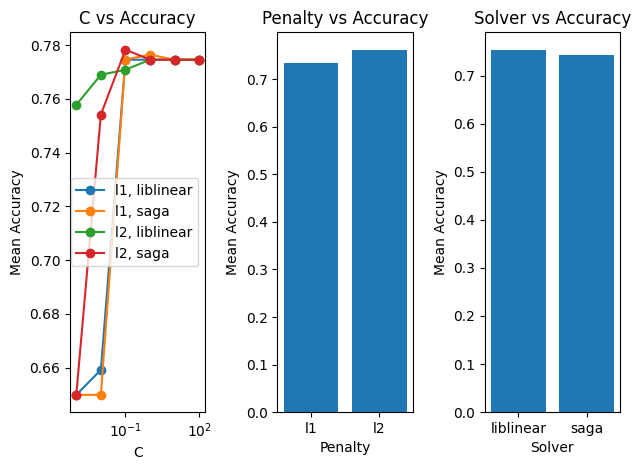

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.7783489096573208


In [27]:
#Grid search paarmters
#C parameter
plt.subplot(131)
for penalty in ['l1', 'l2']:
    for solver in ['liblinear', 'saga']:
        subset = results[(results['param_penalty'] == penalty) & (results['param_solver'] == solver)]
        plt.semilogx(subset['param_C'], subset['mean_test_score'], 
                     marker='o', label=f'{penalty}, {solver}')
plt.xlabel('C')
plt.ylabel('Mean Accuracy')
plt.title('C vs Accuracy')
plt.legend()

# Penalty
plt.subplot(132)
penalties = results.groupby('param_penalty')['mean_test_score'].mean()
plt.bar(penalties.index, penalties.values)
plt.xlabel('Penalty')
plt.ylabel('Mean Accuracy')
plt.title('Penalty vs Accuracy')

# Solver
plt.subplot(133)
solvers = results.groupby('param_solver')['mean_test_score'].mean()
plt.bar(solvers.index, solvers.values)
plt.xlabel('Solver')
plt.ylabel('Mean Accuracy')
plt.title('Solver vs Accuracy')

plt.tight_layout()
plt.show()

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [28]:
#(6)
#Training with 5-fold cross-validation
best_model = LogisticRegression(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, Y_train)

LogisticRegression(C=0.1, random_state=42, solver='saga')

Test Accuracy: 0.7403 




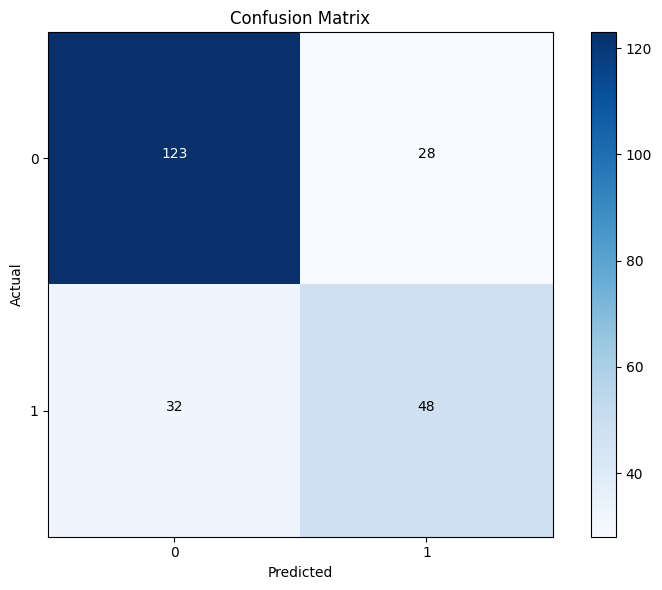

In [33]:
#(7)
#Evaluating the model and plot confusion matrix
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.4f}","\n\n")

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()